In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Saving car_age_price.csv to car_age_price.csv


{'car_age_price.csv': b'Year,Price\r2018,465000\r2019,755000\r2019,700000\r2018,465000\r2018,465000\r2015,350000\r2016,425000\r2017,575000\r2017,509999\r2017,575000\r2019,500000\r2018,500000\r2017,500000\r2019,600000\r2017,475000\r2017,500000\r2017,500000\r2017,550000\r2019,500000\r2017,500000\r2018,500000\r2019,500000\r2015,434999\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2019,650000\r2017,550000\r2017,550000\r2017,550000\r2017,450000\r2017,550000\r2017,550000\r2017,486000\r2018,475000\r2020,545000\r2019,525000\r2019,600000\r2018,550000\r2019,550000\r2019,550000\r2018,450000\r2019,500000\r2018,450000\r2016,396000\r2018,600000\r2013,325000\r2018,550000\r2013,345000\r2013,345000\r2017,525000\r2017,550000\r2014,341000\r2017,550000\r2014,450000\r2016,550000\r2015,490000\r2017,540000\r2017,540000\r2017,595000\r2015,490000\r2017,495000\r2017,525000\r2015,400000\r2015,465000\r2015,300000\r2015,450000\r2017,490000\r2015,300000\r2013,320000\r20

In [3]:
data=pd.read_csv('car_age_price.csv')

In [4]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


**Get the number of rows and columns in the dataset**

In [5]:
data.shape

(112, 2)

**To get the informations of the dataset**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


**To get the sum of number of null values in dataset**

In [7]:
data.isna().sum()

Year     0
Price    0
dtype: int64

**Correlation Matrix**

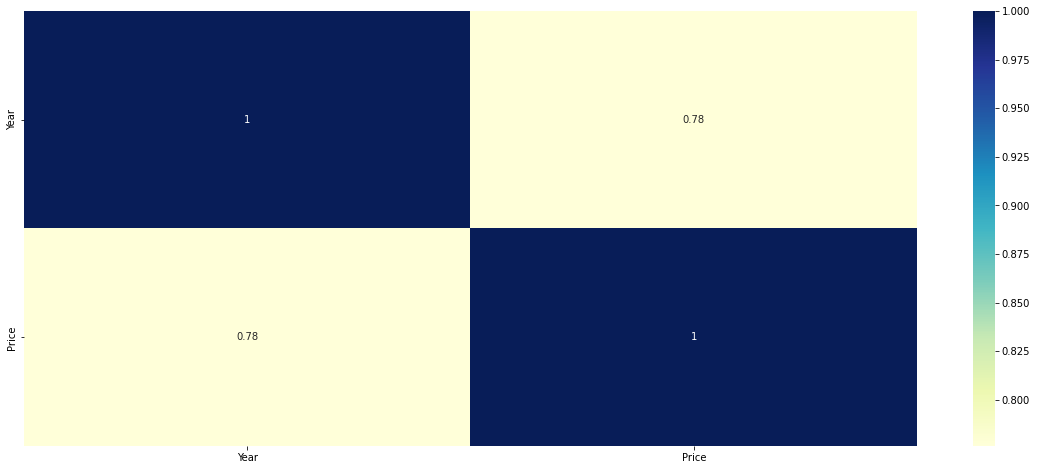

In [9]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,annot=True, cmap='YlGnBu')

**Defining variables x and y**

In [16]:
y=data['Price']
x=data.drop('Year',axis=1)

**Importing train_test_split to split data**

In [10]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

**Importing Linear Regression**

In [18]:
from sklearn.linear_model import LinearRegression

**Defining Model**

In [19]:
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

**Prediction value of Price**

In [20]:
y_pred

array([525000., 495000., 465000., 450000., 550000., 300000., 550000.,
       500000., 500000., 550000., 320000., 550000., 465000., 640000.,
       465000., 500000., 345000., 390000., 375000., 520000., 550000.,
       500000., 550000.])

**Importing Mean Squared Error and R square Error**

In [21]:
from sklearn.metrics import mean_squared_error,r2_score

**Print Mean Square Error and R Square Error**

In [22]:
print('MSE is:',mean_squared_error(y_test,y_pred))
print('R Squared Value is:',r2_score(y_test,y_pred))

MSE is: 7.365503889167829e-22
R Squared Value is: 1.0


**Importing Lasso Regression**

In [23]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import os

**target variable: price of car**

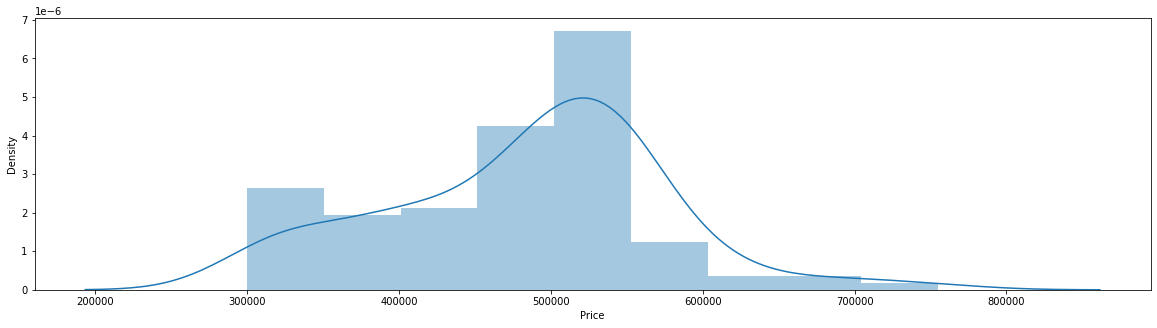

In [27]:
plt.figure(figsize=(20,5))
sns.distplot(data['Price'])
plt.show()

**Defining x and y**

In [28]:
y=data['Price']
x=data.drop('Year',axis=1)

**Lasso Regression**

In [29]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 5

**cross validation**

In [31]:
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [32]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004340,0.004019,0.001718,0.000486,0.0001,{'alpha': 0.0001},-1.008933e-09,-5.497390e-10,-8.472448e-10,-1.251465e-09,-7.635476e-10,-8.841858e-10,2.358934e-10,1,-8.403219e-10,-7.894926e-10,-8.288443e-10,-9.378812e-10,-8.900921e-10,-8.573264e-10,5.150625e-11
1,0.002327,0.000158,0.001481,0.000115,0.001,{'alpha': 0.001},-1.014754e-08,-5.600870e-09,-8.478916e-09,-1.265693e-08,-7.536180e-09,-8.884087e-09,2.391284e-09,2,-8.414696e-09,-8.102342e-09,-8.366326e-09,-9.536218e-09,-8.720639e-09,-8.628045e-09,4.947182e-10
2,0.002215,0.000175,0.001446,0.000054,0.01,{'alpha': 0.01},-1.013654e-07,-5.606044e-08,-8.468891e-08,-1.262589e-07,-7.526593e-08,-8.872792e-08,2.380329e-08,3,-8.411499e-08,-8.107343e-08,-8.362473e-08,-9.517690e-08,-8.704956e-08,-8.620792e-08,4.869645e-09
3,0.002103,0.000062,0.001446,0.000101,0.05,{'alpha': 0.05},-5.069046e-07,-2.802958e-07,-4.234672e-07,-6.311683e-07,-3.763707e-07,-4.436413e-07,1.189813e-07,4,-4.206996e-07,-4.054164e-07,-4.181138e-07,-4.757829e-07,-4.352947e-07,-4.310615e-07,2.429241e-08
4,0.002089,0.000049,0.001395,0.000031,0.1,{'alpha': 0.1},-1.013790e-06,-5.605818e-07,-8.469247e-07,-1.262408e-06,-7.527346e-07,-8.872878e-07,2.379867e-07,5,-8.413524e-07,-8.108196e-07,-8.362219e-07,-9.516231e-07,-8.705869e-07,-8.621208e-07,4.861323e-08


**plotting mean test and train scores with alpha **

In [33]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

**Plotting**

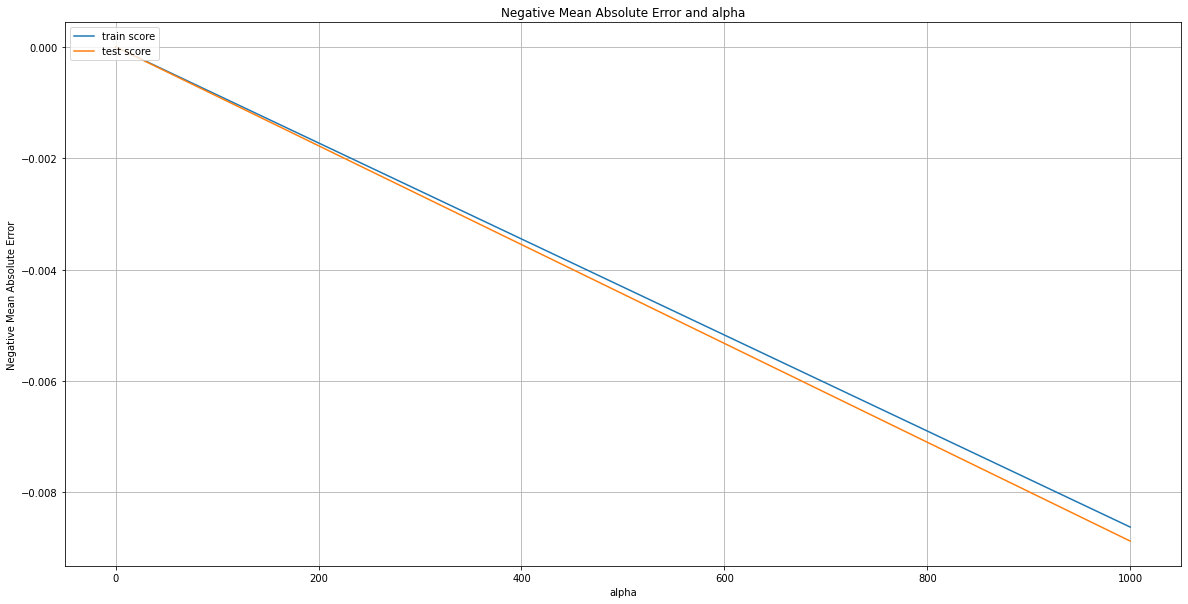

In [34]:
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [36]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 
lasso.coef_

array([0.99999999])

In [38]:
imp_lasso = pd.DataFrame({
    "Varname": x_train.columns,
    "Coefficient": lasso.coef_})
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,Price,1.0


In [39]:
imp_lasso =imp_lasso[imp_lasso['Coefficient'] !=0]
imp_lasso.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
0,Price,1.0


In [41]:
y_pred = lasso.predict(x_test)

In [42]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
40,525000,525000.0
65,495000,495000.0
4,465000,465000.0
47,450000,450000.0
42,550000,550000.0


In [43]:
from sklearn import metrics 

In [44]:
metrics.explained_variance_score(y_test,y_pred)

0.9999999999999999

In [45]:
metrics.mean_absolute_error(y_test,y_pred)

0.0007484840461984277

In [46]:
metrics.max_error(y_test,y_pred)

0.0021461626747623086

In [47]:
metrics.mean_squared_error(y_test,y_pred)

9.260308077748592e-07

In [48]:
metrics.mean_squared_log_error(y_test,y_pred)

6.586092207256472e-18

In [49]:
metrics.median_absolute_error(y_test,y_pred)

0.000758821377530694

In [50]:
metrics.r2_score(y_test,y_pred)

0.9999999999999999

In [51]:
metrics.mean_poisson_deviance(y_test,y_pred)

-2.0246142926423445e-11

In [52]:
metrics.mean_gamma_deviance(y_test,y_pred)

-7.723290606088045e-17

In [53]:
metrics.mean_tweedie_deviance(y_test,y_pred)

9.260308077748592e-07

**The predicted value of  the possible price of a 2022 model second-hand grand i10 is 10 lakhs**